## Support Vector Machines
*Use support vector machines (SVMs) to build a spam classifier*

In [1]:
from numpy import *
%pylab inline
import scipy.optimize as op
import pandas as pd
import os
import scipy.io as sio
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


*Load sample data, play with pandas a bit*

In [2]:
raw_data = sio.loadmat("ex6data1.mat")

In [3]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

In [4]:
data

,X1,X2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


*Create sub-data sets for positive (1) and negative (0) data and plot in 2D. Data has a linear boundary.*

In [5]:
positive = data[data['y']==1]
negative = data[data['y']==0]
positive.shape, negative.shape, type(positive)

((21, 3), (30, 3), pandas.core.frame.DataFrame)

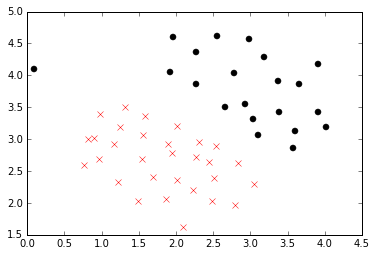

In [6]:
figure
plot(positive["X1"],positive["X2"],'ko')
plot(negative['X1'],negative['X2'],'rx')

*Fit Linear SVC (from package sklearn) with C = 1. C parameter is a positive value that controls the penalty for misclassifed training examples.*

In [7]:
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [8]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [9]:
xx,yy = meshgrid(linspace(min(data['X1']),max(data['X1']),100), linspace(min(data['X2']),max(data['X2']),100))

In [10]:
xx.shape, yy.shape

((100L, 100L), (100L, 100L))

In [11]:
Xpred = array([xx.ravel(),yy.ravel()]).T
Xpred.shape

(10000L, 2L)

In [12]:
Z = svc.predict(Xpred)
Z = Z.reshape(xx.shape)

*PLot results with decision boundary.*

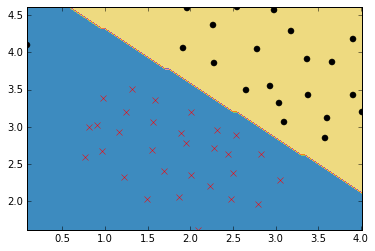

In [13]:
figure
contourf(xx, yy, Z, cmap=plt.cm.Paired)
plot(positive["X1"],positive["X2"],'ko')
plot(negative['X1'],negative['X2'],'rx')

*Repeat fit with C = 1000. Now the model fits the outlier as well, but seems a bit artificial.*

In [14]:
svc2 = svm.LinearSVC(C=1000, loss='hinge', max_iter=1000)

In [15]:
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

0.94117647058823528

In [16]:
Z = svc2.predict(Xpred)
Z = Z.reshape(xx.shape)
Z.shape

(100L, 100L)

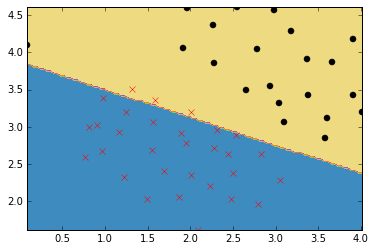

In [17]:
figure
contourf(xx, yy, Z, cmap=plt.cm.Paired)
plot(positive["X1"],positive["X2"],'ko')
plot(negative['X1'],negative['X2'],'rx')

## Implement Gaussian Kernel with SVM
*Load new data, with a more complex decision boundary*

In [18]:
raw_data = sio.loadmat("ex6data2.mat")

In [19]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

In [20]:
data

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1
5,0.328341,0.929094,1
6,0.429724,0.934942,1
7,0.620968,0.934942,1
8,0.756912,0.910088,1
9,0.819124,0.879386,1


In [21]:
positive = data[data['y']==1]
negative = data[data['y']==0]
positive.shape, negative.shape, type(positive)

((480, 3), (383, 3), pandas.core.frame.DataFrame)

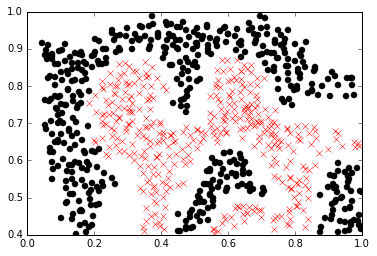

In [22]:
figure
plot(positive["X1"],positive["X2"],'ko')
plot(negative['X1'],negative['X2'],'rx')

*Use SVC with default RBC (radial basis function) kernel. SVC fits 99% of the data.*

In [23]:
svc = svm.SVC(C=100, gamma=20, probability=True)
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.99304750869061409

*Plot the data with the decision boundary*

In [24]:
xx,yy = meshgrid(linspace(min(data['X1']),max(data['X1']),100), linspace(min(data['X2']),max(data['X2']),100))

In [25]:
Xpred = array([xx.ravel(),yy.ravel()]).T
Xpred.shape

(10000L, 2L)

In [26]:
Z = svc.predict(Xpred)
Z = Z.reshape(xx.shape)
Z.shape

(100L, 100L)

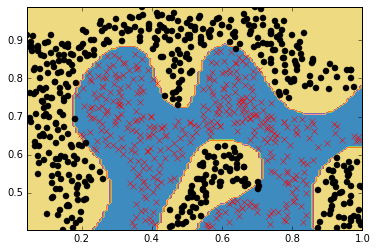

In [27]:
figure
contourf(xx, yy, Z, cmap=plt.cm.Paired)
plot(positive["X1"],positive["X2"],'ko')
plot(negative['X1'],negative['X2'],'rx')

*Load third data set. Make fits to the testdata for varying parameters C and gamma. Use the fit to find the performance on the validation set, optimize parameters.*

In [28]:
raw_data = sio.loadmat('ex6data3.mat')

X = raw_data['X']
Xval = raw_data['Xval']
y = raw_data['y'].ravel()
yval = raw_data['yval'].ravel()

In [29]:
X.shape, Xval.shape

((211L, 2L), (200L, 2L))

*Note that gamma is = 1/2sigma in typical Gaussian formulation*

*Define a function which scans the parameters C and gamma and returns the SVC score for the test (S) and validation (Sval) data sets.*

In [30]:
def optimize_parameters(X,y,Xval,yval):
    c = array([0.01,0.03,0.1,0.3,1,3,10,30])
    g = copy(c)
    m = len(c)
    C,G = meshgrid(c,g)
    S = zeros(shape(C))
    Sval = zeros(shape(C))
    
    # loop through all combinations of C and gamma
    for ic in range(m):
        for ig in range(m):
            svc = svm.SVC(C=c[ic], gamma=g[ig], probability=True)
            svc.fit(X, y)
            # score on the training data
            S[ic,ig]=svc.score(X, y)
            # score on the validation data
            Sval[ic,ig]=svc.score(Xval,yval)
    
    return C, G, S, Sval        

In [31]:
C, G, S, Sval = optimize_parameters(X,y,Xval,yval)

*Visualize the scores vs. both parameters*

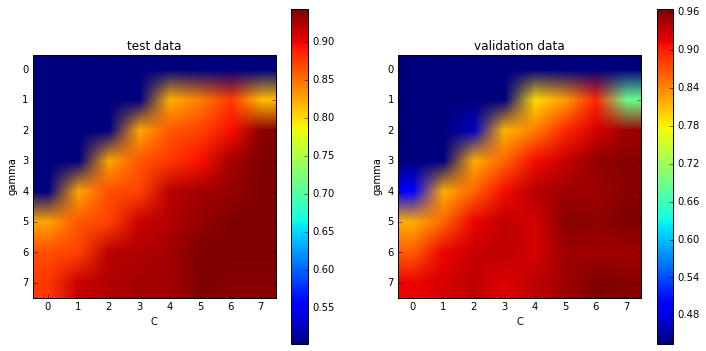

In [32]:
figure(figsize = (12,6))
subplot(1,2,1)
p = imshow(S)
colorbar(p)
xlabel('C')
ylabel('gamma')
title('test data')
subplot(1,2,2)
q = imshow(Sval)
colorbar(q)
xlabel('C')
ylabel('gamma')
title('validation data')

In [33]:
maxval = amax(Sval)
maxval

0.96499999999999997

*Find the values for C and gamma which maximize the score*

In [34]:
index = argwhere(Sval==maxval)
index

array([[5, 7],
       [7, 6]], dtype=int64)

*There are two minima, let's plot them both*

In [35]:
C[5,7],G[5,7]

(30.0, 3.0)

In [36]:
svc = svm.SVC(C=30, gamma=3, probability=True)
svc.fit(X, y)

SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
xx,yy = meshgrid(linspace(min(X[:,0]),max(X[:,0]),100), linspace(min(X[:,1]),max(X[:,1]),100))

In [38]:
Xpred = array([xx.ravel(),yy.ravel()]).T

In [39]:
Z = svc.predict(Xpred)
Z = Z.reshape(xx.shape)

In [40]:
positive = X[y==1,:]
negative = X[y==0,:]
posval = Xval[yval==1]
negval = Xval[yval==0]
positive = append(positive,posval,axis = 0)
negative = append(negative,posval,axis = 0)

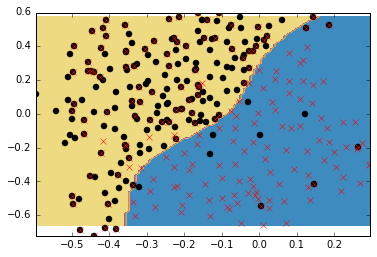

In [41]:
figure
contourf(xx, yy, Z, cmap=plt.cm.Paired)
plot(positive[:,0],positive[:,1],'ko')
plot(negative[:,0],negative[:,1],'rx')

In [42]:
C[7,6],G[7,6]

(10.0, 30.0)

In [43]:
svc = svm.SVC(C=10, gamma=30, probability=True)
svc.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=30, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
Z = svc.predict(Xpred)
Z = Z.reshape(xx.shape)

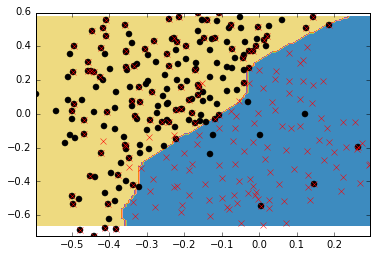

In [45]:
figure
contourf(xx, yy, Z, cmap=plt.cm.Paired)
plot(positive[:,0],positive[:,1],'ko')
plot(negative[:,0],negative[:,1],'rx')

*The first set of parameters gives a much smoother decision boundary.*

## Use SVM to create a spam filter

In [46]:
import re
import string

In [47]:
from stemming.porter2 import stem

*Create dictionary from words in vocab.txt. vocab.txt contains all words which occur at least a 100 times in the spam corpus,
resulting in a list of 1899 words.*

In [48]:
d = {}
with open("vocab.txt") as f:
    for line in f:
       (val, key) = line.split()
       d[key] = int(val)

*Process the emails. Map each word in the preprocessed emails into a list of word indices that contains the index of the word in the vocabulary list. v is a vector the length of the dictionary, with values zero (the word is not in the email) or one (the word is present in the email).*

In [49]:
def process_email(fname,d):
    # read in file
    with open (fname, "r") as myfile:
        email_contents=myfile.read()
        
    # make lower case
    email_contents = string.lower(email_contents)
    # remove html
    email_contents = re.sub('<[^<>]+>', ' ', email_contents)
    # identify numbers
    email_contents = re.sub('[0-9]+', ' number ',email_contents)
    # identify web addresses
    email_contents = re.sub('(http|https)://[^\s]*', ' httpaddr ', email_contents)
    # identify email addresses
    email_contents = re.sub('[^\s]+@[^\s]+', ' emailaddr ', email_contents)
    # identify dollars
    email_contents = re.sub('[$]+', ' dollar ', email_contents)
    # remove contractions
    email_contents = re.sub('[\']+',' ', email_contents)
    # split into words
    email_contents = re.findall(r"[\w']+", email_contents)
    # stem the words to classify similar words
    email_contents = [stem(word) for word in email_contents]
    
    # itemize words in the dictionary
    l = []
    for word in email_contents:
        if word in d:
            l.append(d[word])
    
    v = zeros(len(d))
    v[l] = 1
    
    return v

In [50]:
v = process_email('emailSample1.txt',d)

In [51]:
len(v), sum(v)

(1899, 45.0)

*Now use preprocessed data for training a spam filter. spamTrain.mat contains 4000 training examples of spam and non-spam email, while spamTest.mat contains 1000 test examples. Each original email was processed using the processEmail and emailFeatures
functions and converted into a vector of words X. y is a vector which indicates whether the email was spam or not.*

In [52]:
spam_train = sio.loadmat('spamTrain.mat')
spam_test = sio.loadmat('spamTest.mat')

In [53]:
X = spam_train['X']
y = spam_train['y'].ravel()
X_test = spam_test['Xtest']
y_test = spam_test['ytest'].ravel()
X.shape, y.shape, X_test.shape, y_test.shape

((4000L, 1899L), (4000L,), (1000L, 1899L), (1000L,))

*Train an SVC with the spam data. Use rbf kernel.*

In [54]:
svc = svm.SVC()
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

*The spam classifier has 94% accuracy on the training data, and 95% accuracy on the test data.*

In [55]:
svc.fit(X, y)
svc.score(X,y)

0.94399999999999995

In [56]:
svc.score(X_test,y_test)

0.95299999999999996

In [57]:
sum(y), len(y)

(1277, 4000)

*Try again, using linear kernel (note that this is in a 1899 dim space).*

In [58]:
svc2 = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)

In [59]:
svc2.fit(X,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

*The linear SVC actually does a better job than with the rbf kernel.*

In [60]:
svc2.score(X_test,y_test)

0.97699999999999998

*Check which words are most associated with spam according to the SVM.*

In [61]:
w = svc2.coef_

In [62]:
k = sorted(d.keys(), key = d.get)

In [63]:
key_weight = zip(w.T,k)

In [64]:
s = sorted(key_weight, reverse=True)

In [65]:
s

[(array([ 0.70872631]), 'our'),
 (array([ 0.59182711]), 'flash'),
 (array([ 0.5475101]), 'wi'),
 (array([ 0.54325597]), 'numberb'),
 (array([ 0.5167687]), 'instruct'),
 (array([ 0.50724728]), 'remov'),
 (array([ 0.49155915]), 'visit'),
 (array([ 0.48511653]), 'click'),
 (array([ 0.47582354]), 'bodi'),
 (array([ 0.45731709]), 'guarante'),
 (array([ 0.45312999]), 'send'),
 (array([ 0.45039365]), 'tel'),
 (array([ 0.41652344]), 'tm'),
 (array([ 0.41557159]), 'basenumb'),
 (array([ 0.40052126]), 'dollarnumb'),
 (array([ 0.39196121]), 'will'),
 (array([ 0.36791147]), 'nbsp'),
 (array([ 0.36704]), 'lo'),
 (array([ 0.35218545]), 'pai'),
 (array([ 0.34237554]), 'below'),
 (array([ 0.34094634]), 'credit'),
 (array([ 0.33720716]), 'real'),
 (array([ 0.32567734]), 'request'),
 (array([ 0.30216251]), 'price'),
 (array([ 0.30089465]), 'websit'),
 (array([ 0.29716195]), 'fa'),
 (array([ 0.29607502]), 'mai'),
 (array([ 0.29486085]), 'most'),
 (array([ 0.2780424]), 'want'),
 (array([ 0.27768845]), 'he